In [1]:
import pandas as pd
import numpy as np

In [2]:
Online_Retail_dt=pd.read_csv('Копия Data Sample (AIC-1) - Online Retail.csv')

In [3]:
Online_Retail_dt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,"2,75",17850.0,United Kingdom


In [ ]:
#В этом ноутбуке нет большей части описательной статистики для исследования данных, так как это все было проделано в ноубтуке 
#Итоговая работа_датасет_с_когортами

In [4]:
#Удалить дубликаты
Online_Retail_dt.duplicated().sum()
Online_Retail_dt = Online_Retail_dt.drop_duplicates()

In [5]:
#Преобразование InvoiceDate в нормальную дату
from datetime import datetime
import datetime as dt
Online_Retail_dt['InvoiceDate'] = pd.to_datetime(Online_Retail_dt['InvoiceDate'])

In [6]:
#Преобразовать CustomerID в объект
Online_Retail_dt.CustomerID=Online_Retail_dt.CustomerID.astype('object')

In [7]:
#Преобразовать UnitPrice в число
Online_Retail_dt.UnitPrice=Online_Retail_dt.UnitPrice.replace(regex=r'(,)', value='.')
Online_Retail_dt.UnitPrice=Online_Retail_dt.UnitPrice.astype('float')

In [9]:
#Добавить столбец с выручкой
Online_Retail_dt['Gross_revenue']=\
Online_Retail_dt['Quantity']*Online_Retail_dt['UnitPrice']

In [8]:
#Проверка и удаление пустых значений в CustomerID
Online_Retail_dt.loc[Online_Retail_dt.CustomerID.isnull()]
Online_Retail_dt=Online_Retail_dt.dropna(subset=['CustomerID'])

In [10]:
#Проверка и удаление  пустых значений в Description
Online_Retail_dt.loc[Online_Retail_dt.Description.isnull()].head()
Online_Retail_dt=Online_Retail_dt.dropna(subset=['Description'])

In [11]:
Online_Retail_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40593 entries, 0 to 54213
Data columns (total 9 columns):
InvoiceNo        40593 non-null object
StockCode        40593 non-null object
Description      40593 non-null object
Quantity         40593 non-null int64
InvoiceDate      40593 non-null datetime64[ns]
UnitPrice        40593 non-null float64
CustomerID       40593 non-null object
Country          40593 non-null object
Gross_revenue    40593 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 3.1+ MB


In [ ]:
#Есть отрицательные значения в количестве, видимо возвраты.Уберем эти значения из основного датасета

In [12]:
Online_Retail_dt = Online_Retail_dt.query('Quantity > 0 and UnitPrice > 0')

In [13]:
#Группиуем по товарам, чтобы определить общее количество купленных единиц, общую выручку, среднюю ценю и с каких странах покупают
Product_groups=Online_Retail_dt.groupby(['Country','StockCode', 'Description'], as_index=False)\
.aggregate({'Quantity':'sum','Gross_revenue':'sum','UnitPrice':'mean'})

Product_groups.head()

,Country,StockCode,Description,Quantity,Gross_revenue,UnitPrice
0,Australia,20675,BLUE POLKADOT BOWL,72,76.32,1.06
1,Australia,20712,JUMBO BAG WOODLAND ANIMALS,10,20.80,2.08
2,Australia,20713,JUMBO BAG OWLS,10,19.50,1.95
3,Australia,20725,LUNCH BAG RED RETROSPOT,20,33.00,1.65
4,Australia,20726,LUNCH BAG WOODLAND,10,16.50,1.65


In [14]:
Product_groups.to_csv(r'C:\Users\Александра\Downloads\Untitled Folder\Product_groups.csv', index = None, header=True)

In [15]:
#Сгруппируем по странам, чтобы посмотреть количество продаж (уникальных инвойсов), количество покупателей, выручку
Country_groups=Online_Retail_dt.groupby(['Country'], as_index=False)\
.aggregate({'Gross_revenue':'sum', 'InvoiceNo':'nunique', 'CustomerID':'nunique'})


Country_groups.head()

,Country,Gross_revenue,InvoiceNo,CustomerID
0,Australia,17156.59,32,8
1,Austria,1036.27,13,9
2,Bahrain,17.70,1,1
3,Belgium,4066.66,81,24
4,Brazil,79.80,1,1


In [16]:
#Добавим средний чек
Country_groups['Average_order_value']=Country_groups.Gross_revenue/Country_groups.InvoiceNo

In [17]:
#Добавим средний на покупателя
Country_groups['Average_order_value_per_customer']=Country_groups.Gross_revenue/Country_groups.CustomerID

In [18]:
Country_groups.head()

,Country,Gross_revenue,InvoiceNo,CustomerID,Average_order_value,Average_order_value_per_customer
0,Australia,17156.59,32,8,536.143437,2144.573750
1,Austria,1036.27,13,9,79.713077,115.141111
2,Bahrain,17.70,1,1,17.700000,17.700000
3,Belgium,4066.66,81,24,50.205679,169.444167
4,Brazil,79.80,1,1,79.800000,79.800000


In [19]:
#Топ-15 стран по выручке
Top_Country_groups=Country_groups.sort_values('Gross_revenue', ascending=False).head(15)
Top_Country_groups=Top_Country_groups.sort_values('Gross_revenue')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

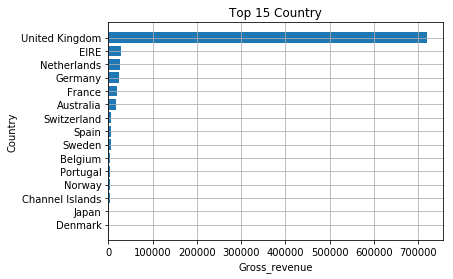

In [22]:

plt.barh(Top_Country_groups['Country'], Top_Country_groups['Gross_revenue'])
plt.xlabel('Gross_revenue')
plt.ylabel('Country')
plt.title('Top 15 Country')
plt.grid()

In [21]:
#Топ-15 стран по среднему чеку
Top_Country_groups_order_value=Country_groups.sort_values('Average_order_value', ascending=False).head(15)
Top_Country_groups_order_value=Top_Country_groups_order_value.sort_values('Average_order_value')

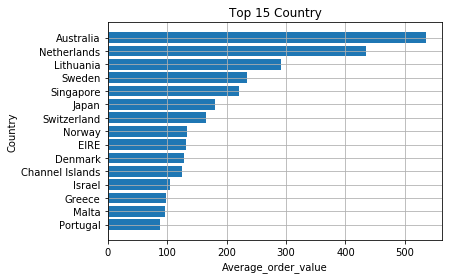

In [23]:
plt.barh(Top_Country_groups_order_value['Country'], Top_Country_groups_order_value['Average_order_value'])
plt.xlabel('Average_order_value')
plt.ylabel('Country')
plt.title('Top 15 Country')
plt.grid()

In [24]:
#Топ-15 стран по среднему чеку на человека
Top_Country_groups_order_value_per_customer=Country_groups.sort_values('Average_order_value_per_customer', ascending=False).head(15)
Top_Country_groups_order_value_per_customer=Top_Country_groups_order_value_per_customer.sort_values('Average_order_value_per_customer')

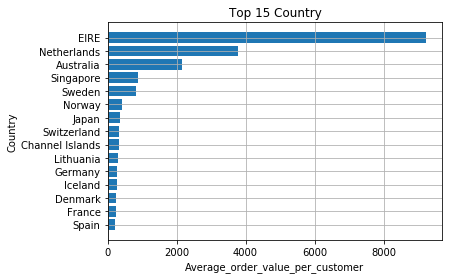

In [25]:
plt.barh(Top_Country_groups_order_value_per_customer['Country'], Top_Country_groups_order_value_per_customer['Average_order_value_per_customer'])
plt.xlabel('Average_order_value_per_customer')
plt.ylabel('Country')
plt.title('Top 15 Country')
plt.grid()

In [75]:
Country_groups.to_csv(r'C:\Users\Александра\Downloads\Untitled Folder\Country_groups.csv', index = None, header=True)